# Swap Curve Bootstrapper

In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
from bootstrapper import *
from sample_curve import *

import calendar as cd
import math
import scipy
import warnings
import numpy as np
import pandas as pd

%matplotlib inline

In [9]:
s23 = SwapCurve(settle, 'log-linear')
for inst in s23_instruments: s23.add_inst(inst)
s23.add_knots()

stripper = CurveStripper()
s23_stripped = stripper.strip_curve(s23, interpolation='log-linear', interp_on='df')

Stripping Curve... Number of knots: 24
Stripping successful! Residual error: 1.483e-10


In [10]:
res = dict(zip(s23_stripped.knots, s23_stripped.knots_dfs))
df = pd.DataFrame({'DF':list(res.values())}, index=list(res.keys()))

df['DF_init'] = np.exp(-s23_stripped.knots_par_rates * s23_stripped.knots_taus)
df['DF_init'][0] = 1
df['DF_BBG'] = np.append(1, bbg_df)
df['ZC'] = -np.log(df['DF']) / s23_stripped.knots_taus * 100
df['ZC_BBG'] = np.append(np.nan, bbg_zc)
df['ZC_SA'] = np.append(np.nan, s23_stripped.get_zcs(s23_stripped.knots_taus, f=2)) * 100
df['ParRates'] = s23_stripped.knots_par_rates * 100

df.head()

,DF,DF_init,DF_BBG,ZC,ZC_BBG,ZC_SA,ParRates
2020-12-03,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
2021-03-03,0.999451,0.999444,0.999430,0.222670,0.23363,0.222794,0.22538
2021-03-17,0.999360,0.999324,0.999311,0.224742,0.24435,0.224868,0.23748
2021-06-16,0.998863,0.998934,0.998794,0.213020,0.22705,0.213134,0.19972
2021-09-15,0.998381,0.998479,0.998291,0.206759,0.21903,0.206865,0.19431


In [11]:
df.tail()

,DF,DF_init,DF_BBG,ZC,ZC_BBG,ZC_SA,ParRates
2040-12-03,0.770545,0.775330,0.767290,1.302394,1.32372,1.306644,1.27146
2045-12-04,0.712010,0.717915,0.708432,1.357614,1.33790,1.362232,1.32460
2050-12-05,0.660228,0.666717,0.656393,1.382761,1.40229,1.387552,1.35019
2060-12-03,0.587991,0.591300,0.582956,1.326699,1.34828,1.331109,1.31268
2070-12-03,0.541540,0.538191,0.533850,1.225871,1.25453,1.229635,1.23827


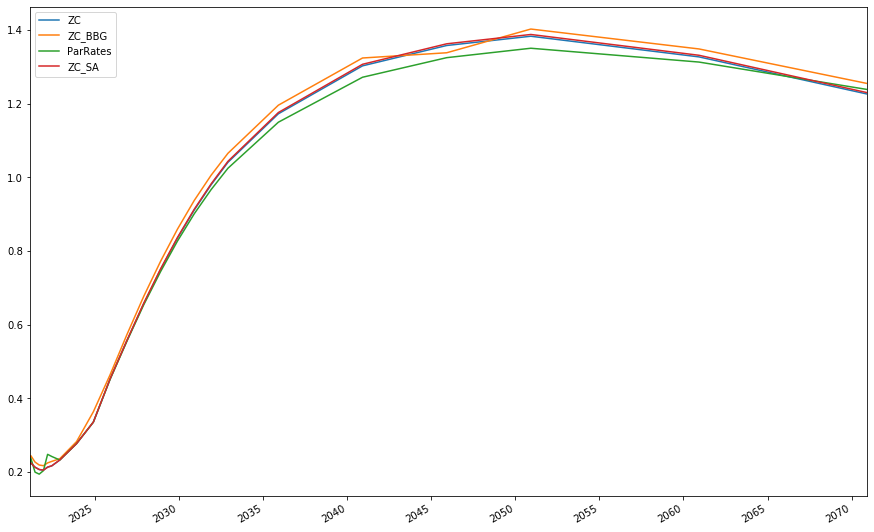

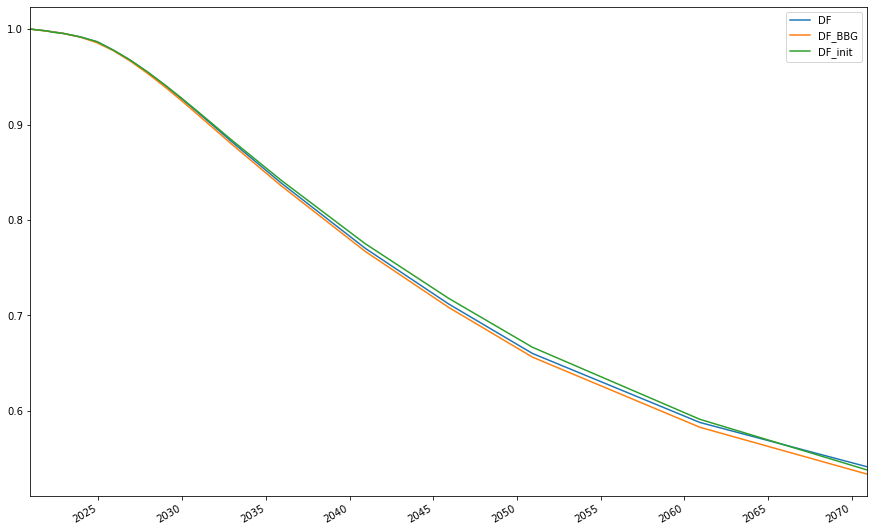

In [12]:
df[['ZC', 'ZC_BBG','ParRates','ZC_SA']][1:].plot(figsize=(15,10))
df[['DF','DF_BBG','DF_init']].plot(figsize=(15,10))

In [13]:
t_i = np.arange(0, 50, 0.5)
t_j = np.arange(0.5, 50.5, 0.5)
fwds = s23.get_fwds(t_i, t_j) * 100

fwd_df = pd.DataFrame({'FWD-LogLin':fwds},index=t_j)

In [14]:
s23_cubic = SwapCurve(settle, 'cubic')
for inst in s23_instruments: s23_cubic.add_inst(inst)
s23_cubic.add_knots()

stripper = CurveStripper()
result_cubic = stripper.strip_curve(s23_cubic, interpolation='cubic', interp_on='df')

Stripping Curve... Number of knots: 24
Stripping successful! Residual error: 1.473e-10


In [15]:
s23_cubic = SwapCurve(settle, 'linear')
for inst in s23_instruments: s23_cubic.add_inst(inst)
s23_cubic.add_knots()

stripper = CurveStripper()
result_linear = stripper.strip_curve(s23_cubic, interpolation='linear', interp_on='df')

Stripping Curve... Number of knots: 24
Stripping successful! Residual error: 1.602e-10


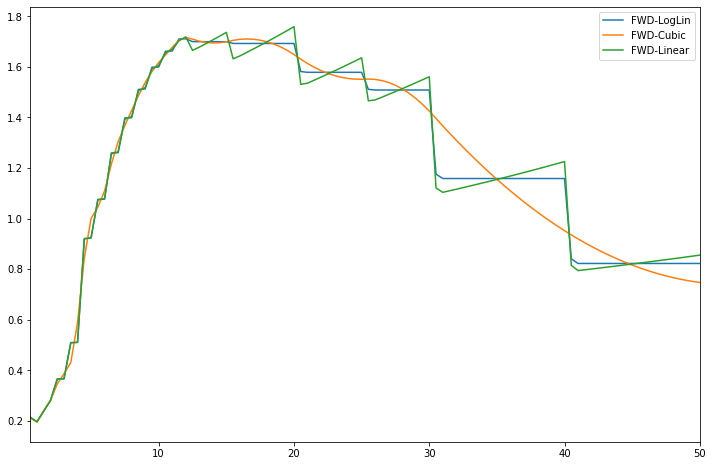

In [16]:
fwd_df['FWD-Cubic'] = result_cubic.get_fwds(t_i, t_j) * 100
fwd_df['FWD-Linear'] = result_linear.get_fwds(t_i, t_j) * 100

fwd_df.plot(figsize=(12,8))